In [374]:
pip install ucimlrepo

Importing Essential Libraries

In [407]:
from ucimlrepo import fetch_ucirepo
# Regular EDA (exploratory data analysis) and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Training
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
# Machine learning algorithms
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Model Evaluations
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

# Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel

# Ignoring the warnings
import warnings
warnings.filterwarnings("ignore")

Loading Dataset

In [408]:
'''
List of available features:

 1. age: continuous
 2. sex: categorical, 2 values {0: female, 1: male}
 3. cp (chest pain type): categorical, 4 values
    {1: typical angina, 2: atypical angina, 3: non-angina, 4: asymptomatic angina}
 4. trestbps (resting blood pressure on admission to hospital): continuous (mmHg)
 5. chol (serum cholesterol level): continuous (mg/dl)
 6. fbs (fasting blood sugar): categorical, 2 values {0: <= 120 mg/dl, 1: > 120 mg/dl}
 7. restecg (resting electrocardiography): categorical, 3 values
    {0: normal, 1: ST-T wave abnormality, 2: left ventricular hypertrophy}
 8. thalach (maximum heart rate achieved): continuous
 9. exang (exercise induced angina): categorical, 2 values {0: no, 1: yes}
10. oldpeak (ST depression induced by exercise relative to rest): continuous
11. slope (slope of peak exercise ST segment): categorical, 3 values
    {1: upsloping, 2: flat, 3: downsloping}
12. ca (number of major vessels colored by fluoroscopy): discrete (0,1,2,3)
13. thal: categorical, 3 values {3: normal, 6: fixed defect, 7: reversible defect}
14. num (heart disease): categorical, 4 values {0: no, 1,2,3,4: yes}

'''

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

# metadata
print(heart_disease.metadata)

# variable information
print(heart_disease.variables)

{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M. Pfisterer, J. Schmid, S. Sa

In [409]:
# Concatenate features (X) and target variable (y) into a single DataFrame
df = pd.concat([X, y], axis=1)

In [410]:
# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nColumns and Data Types:")
print(df.dtypes)

Dataset Shape: (303, 14)

Columns and Data Types:
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca          float64
thal        float64
num           int64
dtype: object


In [379]:
# Display the first few rows of the dataframe
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [380]:
# Display the last few rows of the DataFrame
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
302,38,1,3,138,175,0,0,173,0,0.0,1,NaN,3.0,0


In [381]:
# Summarize numeric columns with descriptive statistics
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


# **Data Cleaning and Preprocessing**

In [382]:
# Show the non null count and datatypes of the variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [383]:
# Checking unique values
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")

Unique values in column 'age': [63 67 37 41 56 62 57 53 44 52 48 54 49 64 58 60 50 66 43 40 69 59 42 55
 61 65 71 51 46 45 39 68 47 34 35 29 70 77 38 74 76]
Unique values in column 'sex': [1 0]
Unique values in column 'cp': [1 4 3 2]
Unique values in column 'trestbps': [145 160 120 130 140 172 150 110 132 117 135 112 105 124 125 142 128 170
 155 104 180 138 108 134 122 115 118 100 200  94 165 102 152 101 126 174
 148 178 158 192 129 144 123 136 146 106 156 154 114 164]
Unique values in column 'chol': [233 286 229 250 204 236 268 354 254 203 192 294 256 263 199 168 239 275
 266 211 283 284 224 206 219 340 226 247 167 230 335 234 177 276 353 243
 225 302 212 330 175 417 197 198 290 253 172 273 213 305 216 304 188 282
 185 232 326 231 269 267 248 360 258 308 245 270 208 264 321 274 325 235
 257 164 141 252 255 201 222 260 182 303 265 309 307 249 186 341 183 407
 217 288 220 209 227 261 174 281 221 205 240 289 318 298 564 246 322 299
 300 293 277 214 207 223 160 394 184 315 409 244 195 196

In [384]:
# Checking duplicate values
data_dup = df.duplicated().any()
if data_dup:
    # If duplicates are found, drop them
    df_encoded = df.drop_duplicates()
    print("Duplicates removed.")
else:
    print("No duplicates found.")

No duplicates found.


In [385]:
# Check for missing values in each column
missing_values = df.isnull().sum()
missing_values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

In [386]:
# Handle missing values
for column in missing_values.index:
    if missing_values[column] > 0:
        if df[column].dtype == 'float64' or df[column].dtype == 'int64':
            median_value = df[column].median()
            df[column].fillna(median_value, inplace=True)
        elif df[column].dtype == 'object':
            mode_value = df[column].mode().values[0]
            df[column].fillna(mode_value, inplace=True)

print("Number of missing values after handling:", df.isnull().sum().sum())

Number of missing values after handling: 0


In [411]:
# Map heart disease diagnosis to binary: 0 for absence, 1 for presence
df['num'] = df['num'].map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})

Feature Encoding

In [389]:
categorical_cols = ['cp', 'restecg', 'exang', 'slope', 'thal', 'sex']

# Perform one-hot encoding for categorical features, including 'fbs'
df_encoded = pd.get_dummies(df, columns=categorical_cols + ['fbs'])

Checking Outliers

In [412]:
# Function to identify outliers using IQR method
def identify_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Function to handle outliers using IQR method
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    return df

# Identify outliers in numerical columns
numeric_cols = df.select_dtypes(include='number').columns
numeric_cols = [col for col in numeric_cols if col != 'fbs']  # Exclude 'fbs' column
outliers = pd.DataFrame()
for col in numeric_cols:
    outliers = outliers.append(identify_outliers(df, col))

# Handle outliers
for col in numeric_cols:
    df = handle_outliers(df, col)

# Check for outliers after handling
outliers_after_handling = pd.DataFrame()
for col in numeric_cols:
    outliers_after_handling = outliers_after_handling.append(identify_outliers(df, col))

print("Number of outliers before handling:", len(outliers))
print("Number of outliers after handling:", len(outliers_after_handling))

Number of outliers before handling: 63
Number of outliers after handling: 0


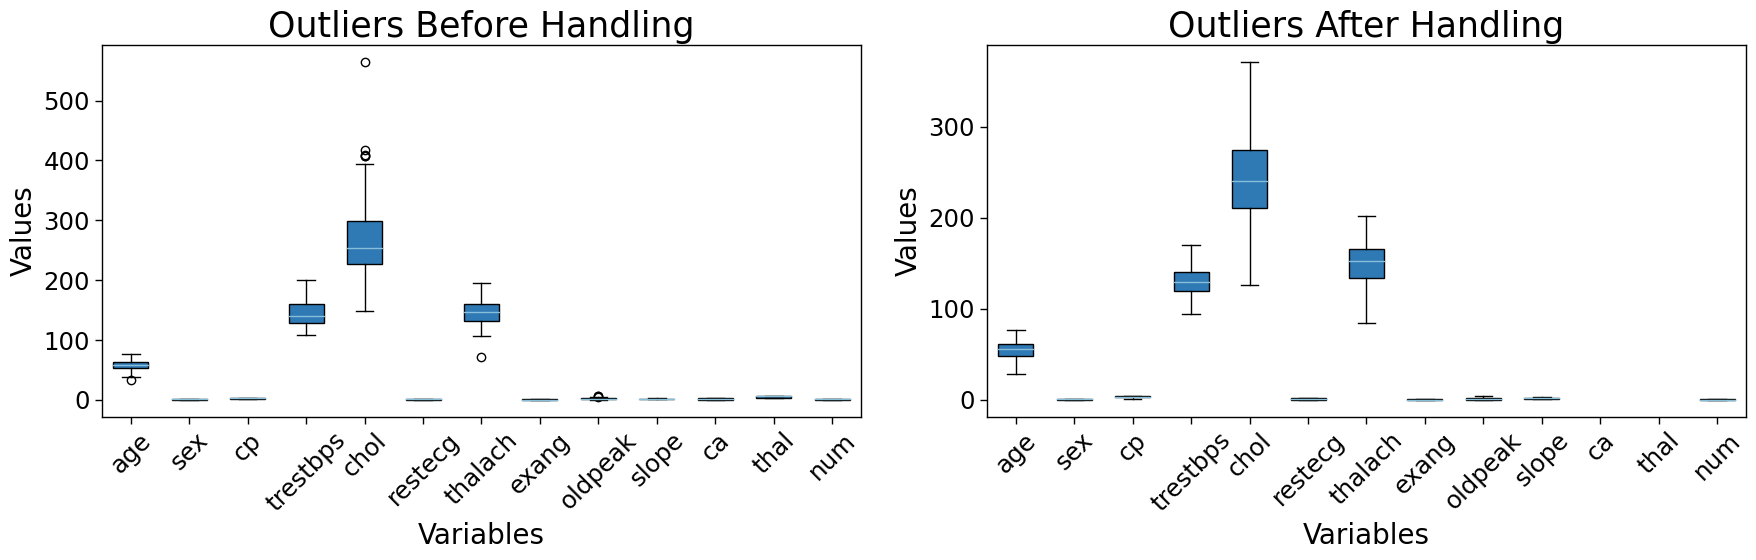

In [414]:
# Create color palette for boxplots
num_cols = len(df[numeric_cols].columns)
colors = plt.cm.cool(np.linspace(0, 1, num_cols))

# Plot boxplots before and after handling outliers
plt.figure(figsize=(18, 6))

# Plot outliers before handling
plt.subplot(1, 2, 1)
plt.boxplot(outliers[numeric_cols].values, patch_artist=True, widths=0.6, labels=outliers[numeric_cols].columns)
plt.title('Outliers Before Handling')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.xticks(rotation=45)  # Rotate xtick labels by 45 degrees

# Plot outliers after handling
plt.subplot(1, 2, 2)
plt.boxplot(df[numeric_cols].values, patch_artist=True, widths=0.6, labels=df[numeric_cols].columns)
plt.title('Outliers After Handling')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.xticks(rotation=45)  # Rotate xtick labels by 45 degrees

plt.tight_layout()
# Save fig
plt.savefig('Outliers.png', bbox_inches='tight')
plt.show()

# **Exploratory Data Analysis**

In [393]:
# Count the occurrences of each class in the target variable
heart_disease_counts = df['num'].value_counts()

# Print the counts:
infected = heart_disease_counts.iloc[1:].sum()
not_infected = heart_disease_counts[0]
print(f"{infected} were infected with heart disease.\n{not_infected} were not infected with heart disease.")

139 were infected with heart disease.
164 were not infected with heart disease.


Analysing target(num) variable

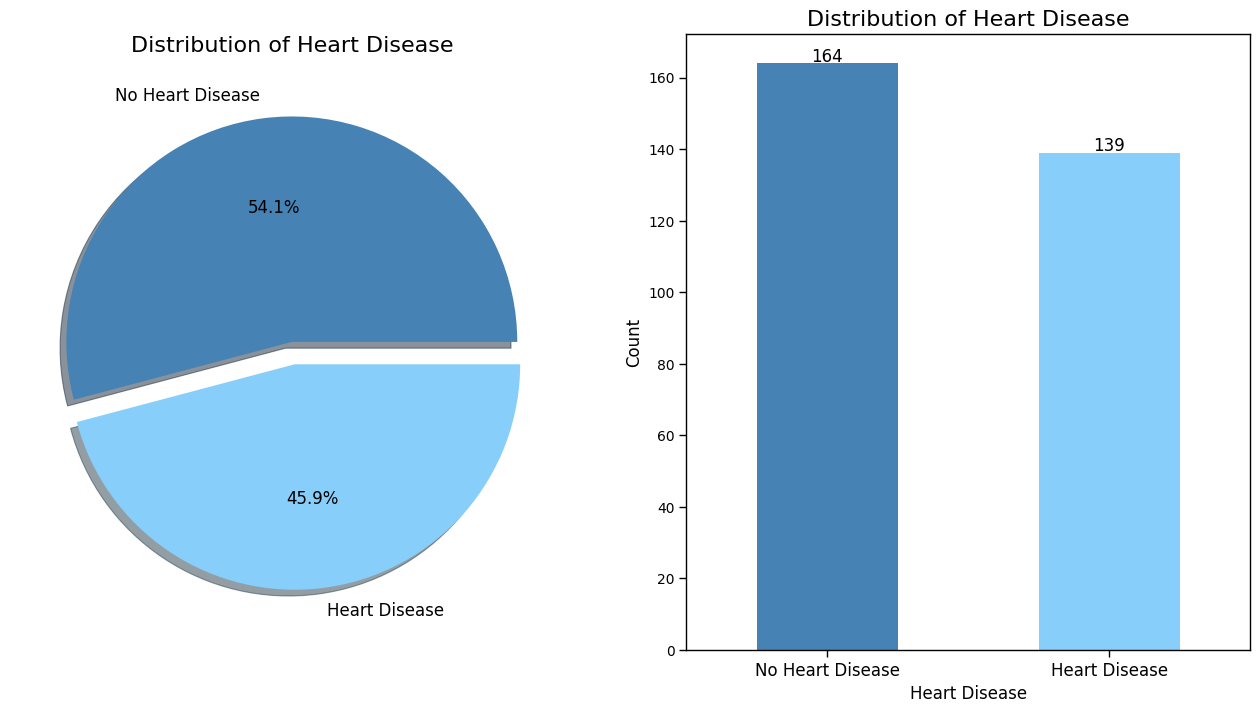

In [509]:
# Replace '1' with 'Heart Disease' and '0' with 'No Heart Disease'
df['num'] = df['num'].replace({1: 'Heart Disease', 0: 'No Heart Disease'})

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# Pie chart
df['num'].value_counts().plot(
    kind='pie', colors=["#4682B4", "#87CEFA"], ax=ax[0], explode=[0, 0.1], autopct='%1.1f%%', shadow=True,
    textprops={'fontsize': 12} )
ax[0].set_ylabel('')
ax[0].set_title('Distribution of Heart Disease', fontsize=16)

# Bar chart
bar_plot = df['num'].value_counts().plot(
    kind='bar', color=["#4682B4", "#87CEFA"], ax=ax[1]
)
ax[1].set_ylabel('Count', fontsize=12)
ax[1].set_xlabel('Heart Disease', fontsize=12)
ax[1].set_xticklabels(["No Heart Disease", "Heart Disease"], rotation=0, fontsize=12)
ax[1].set_title('Distribution of Heart Disease', fontsize=16)

# Add count labels on top of the bars with smaller font size
for p in bar_plot.patches:
    ax[1].annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=12)  # Adjust fontsize
# Reduce the size of y-axis tick labels
plt.yticks(fontsize=10)
# Save fig
plt.savefig('Heart_Disease.png', bbox_inches='tight')
plt.show()


Analysing the 'Sex' feature

In [395]:
df["sex"].unique()

array([1, 0])

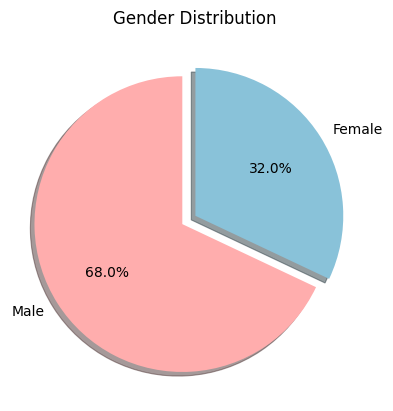

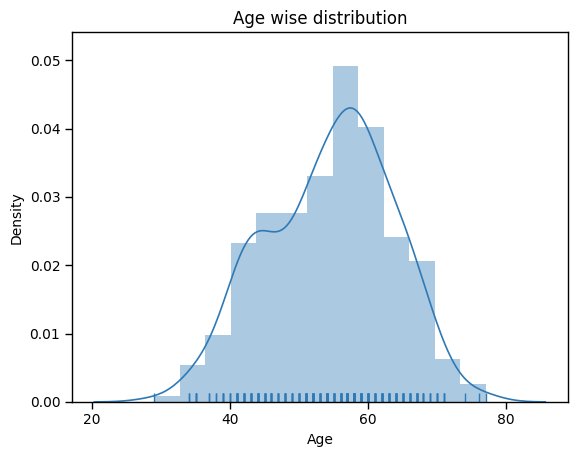

In [514]:
# Check gender distribution in the dataset
gender_dist = df['sex'].value_counts()

# Plotting the pie chart for gender distribution
plt.figure()
plt.pie(gender_dist, labels=['Male', 'Female'], autopct = '%1.1f%%', colors=['#ffadad','#89c2d9'],shadow=True,
        startangle=90,explode=[0.1, 0.005],textprops={'fontsize': 10} )
plt.title("Gender Distribution", fontsize=12, color='black')
plt.savefig('Gender_distribution.png', bbox_inches='tight')

plt.show()

ax= sns.distplot(df['age'], rug=True)
plt.title("Age wise distribution",fontsize=12)
# Adjust x and y-axis labels, xticks, and yticks size
plt.xlabel('Age', fontsize=10)
plt.ylabel('Density', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
# Save fig
plt.savefig('Agewise_distribution.png', bbox_inches='tight')
plt.show()

Comparing Age with Maximum Heart Rate Achieved, to find Pattern of Heart Rates on the Basis of Patient's Age

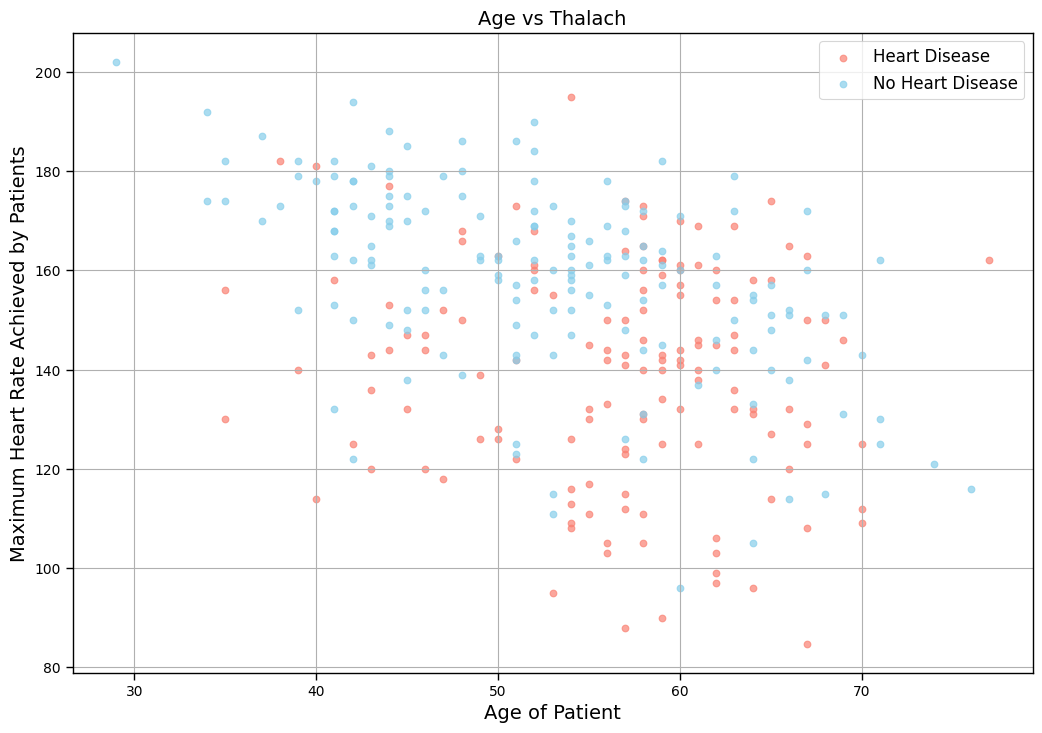

In [518]:
plt.figure(figsize=(12, 8))
# With Heart Disease
plt.scatter(heart_disease_data['age'], heart_disease_data['thalach'], color='salmon', label='Heart Disease', alpha=0.7)

# No Heart Disease
plt.scatter(no_heart_disease_data['age'], no_heart_disease_data['thalach'], color='skyblue', label='No Heart Disease', alpha=0.7)

plt.title('Age vs Thalach',fontsize=14)
plt.xlabel('Age of Patient',fontsize=14)
plt.ylabel('Maximum Heart Rate Achieved by Patients',fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)

# Adjust x and y-ticks size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
# Adjust layout parameters
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
plt.savefig('AgevsThalach.png', bbox_inches='tight')
plt.show()

Distribution of Categorial features

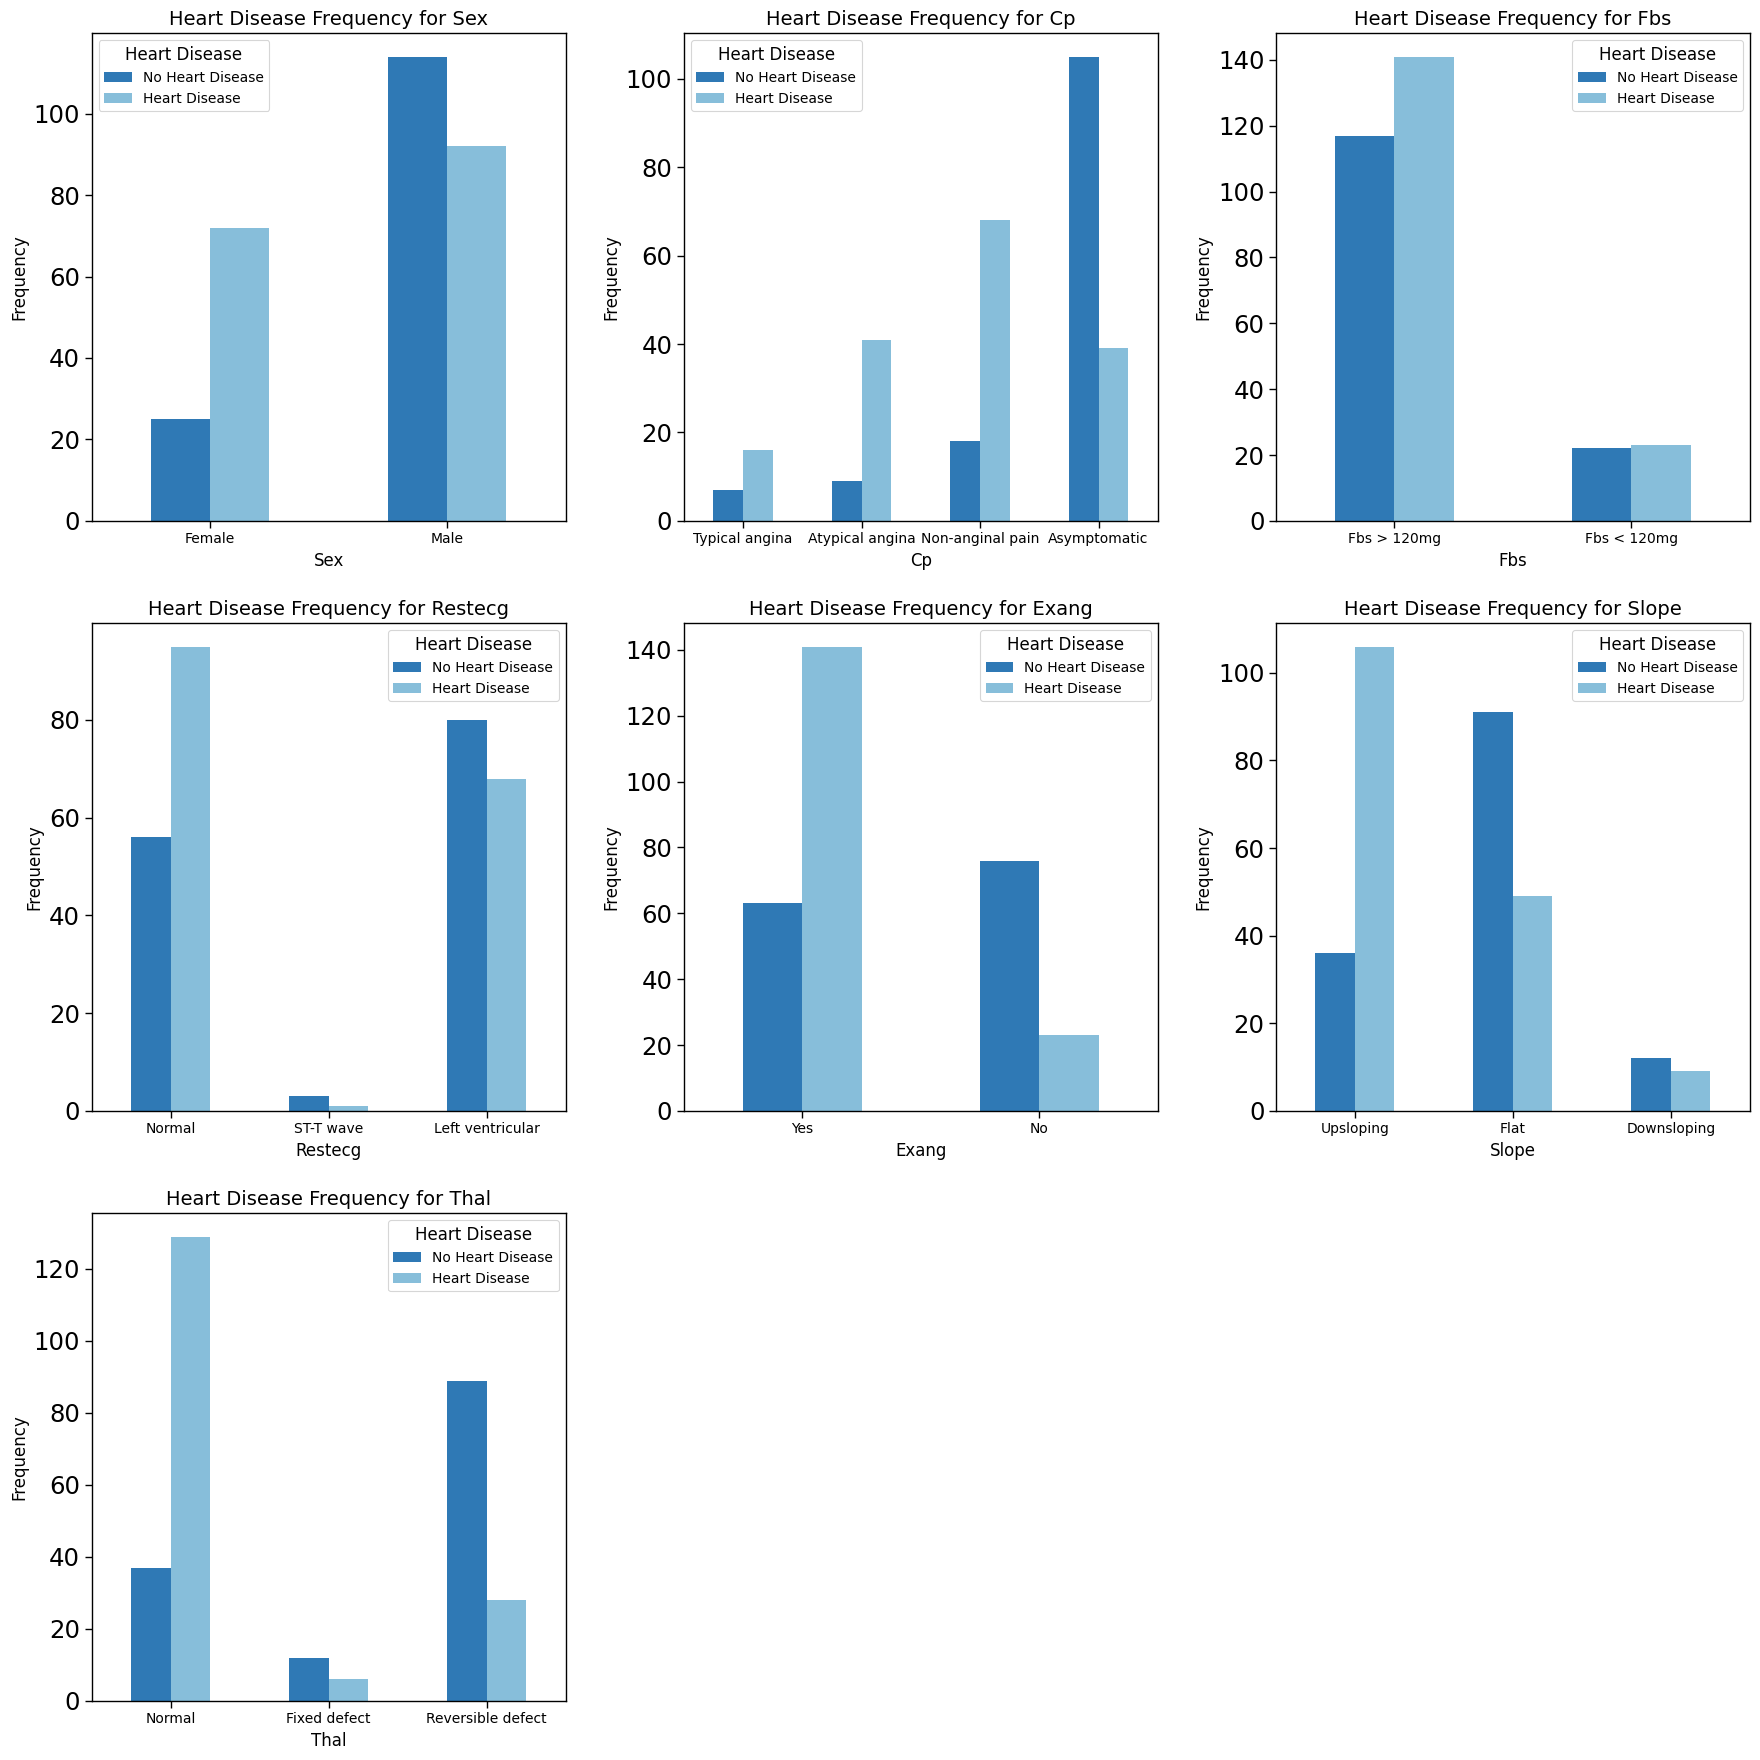

In [519]:
# Set the color palette
sns.set_palette('RdBu_r')

# Assuming 'categorical' contains a list of tuples with the names of categorical columns and their corresponding categories
categorical = [('sex', ['Female', 'Male']),
                ('cp', ['Typical angina', 'Atypical angina', 'Non-anginal pain', 'Asymptomatic']),
                ('fbs', ['Fbs > 120mg', 'Fbs < 120mg']),
                ('restecg', ['Normal', 'ST-T wave', 'Left ventricular']),
                ('exang', ['Yes', 'No']),
                ('slope', ['Upsloping', 'Flat', 'Downsloping']),
                ('thal', ['Normal', 'Fixed defect', 'Reversible defect'])]

# Replace numeric labels with categorical labels for the 'num' column
df['num'] = df['num'].replace({0: 'No Heart Disease', 1: 'Heart Disease'})

# Create a grid of subplots with larger figure size and adjusted layout
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 18))
plt.subplots_adjust(hspace=0.5, wspace=0.5)  # Adjust vertical and horizontal spacing between subplots

# Iterate over each categorical column and create crosstab plots
for (column, categories), ax in zip(categorical, axes.flatten()):
    # Create a crosstab for the current categorical column and 'num'
    crosstab = pd.crosstab(df[column], df['num'])

    # Plot the crosstab as a bar plot
    crosstab.plot(kind="bar", ax=ax)

    # Set x-axis labels and rotate them to 0 degrees
    ax.set_xticklabels(categories, rotation=0, fontsize=10)

    # Set plot title and labels
    ax.set_title(f"Heart Disease Frequency for {column.capitalize()}", fontsize=14)  # Adjust title font size
    ax.set_xlabel(column.capitalize(), fontsize=12)  # Adjust label font size
    ax.set_ylabel('Frequency', fontsize=12)  # Adjust label font size
    ax.legend(title='Heart Disease', labels=['No Heart Disease', 'Heart Disease'], fontsize=10, title_fontsize='12')

# Remove unused subplots
for i in range(len(categorical), len(axes.flatten())):
    fig.delaxes(axes.flatten()[i])

# Show the plot
plt.tight_layout()
plt.savefig('heart_disease_frequency.png', bbox_inches='tight')
plt.show()


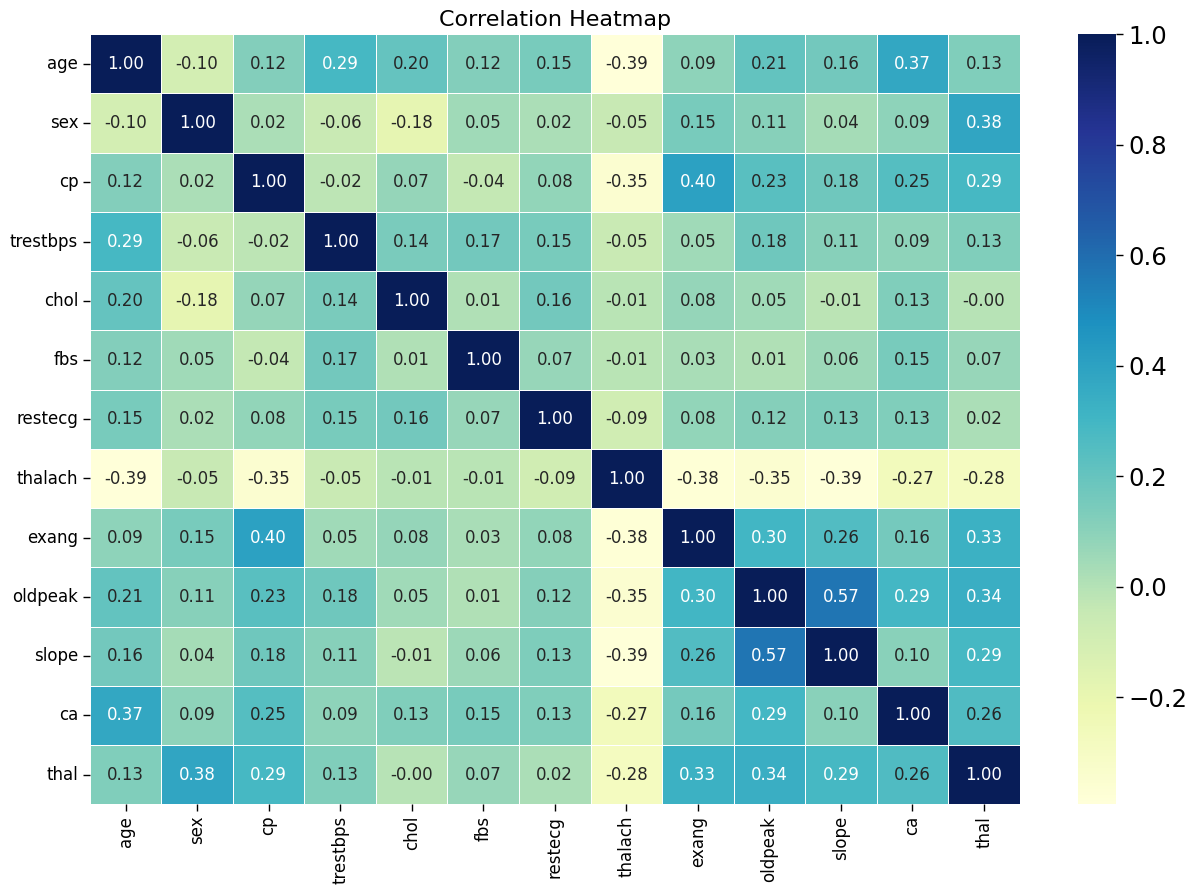

In [523]:
# Correlation Analysis
corr_matrix=df.corr() # Correlation Matrix

fig,ax= plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt='0.2f', cmap='YlGnBu', annot_kws={"size": 12})
ax.set_title('Correlation Heatmap',fontsize=16)
# Adjust x and y ticks font size
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
# Save correlation heatmap
plt.savefig('correlation_heatmap.png', bbox_inches='tight')
plt.show()


Splitting the Data

In [429]:
# Separate features (X) and target variable (y)
X = df_encoded.drop(columns=['num'])  # Features
y = df_encoded['num']  # Target variable

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print the number of data points in each set
print("Number of data points in training set:", len(X_train))
print("Number of data points in validation set:", len(X_val))
print("Number of data points in test set:", len(X_test))

Number of data points in training set: 212
Number of data points in validation set: 45
Number of data points in test set: 46


Feature Scaling

In [401]:
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both the training and validation data
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

Model Development

In [534]:
def plot_confusion_matrix(y_true, y_pred, model_name=None, save_path=None):
    # Calculate confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(10, 8))  # Increase figure size to accommodate labels
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=['No Heart Disease', 'Heart Disease'],
                yticklabels=['No Heart Disease', 'Heart Disease'],
                annot_kws={"size": 18},
                linewidths=0.5,
                square=True)

    plt.title(f'Confusion Matrix - {model_name}', fontsize=12, pad=20)
    plt.xlabel('Predicted labels', fontsize=12)
    plt.ylabel('True labels', fontsize=12)

    # Increase size of x and y tick labels
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    plt.tight_layout()  # Adjust layout to prevent clipping of labels
    save_path = save_path + f'_{model_name}.png'
    plt.savefig(save_path, bbox_inches='tight')
    plt.show()

Random Forest

In [441]:
# Initialize a Random Forest classifier for feature selection
feature_selector = RandomForestClassifier(random_state=42)

# Fit the feature selector to the scaled training data
feature_selector.fit(X_train_scaled, y_train)

# Create a selector to identify features with importance greater than the mean importance
feature_importances = feature_selector.feature_importances_
selector = SelectFromModel(feature_selector, threshold=np.mean(feature_importances))

# Transform the training, validation, and test sets to select the most important features
X_train_selected = selector.transform(X_train_scaled)
X_val_selected = selector.transform(X_val_scaled)
X_test_selected = selector.transform(X_test_scaled)

# Initialize the RF classifier
rf_classifier = RandomForestClassifier(random_state=42, class_weight='balanced')

# Train the RF classifier
rf_classifier.fit(X_train_selected, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

Hyperparameter tuning

In [442]:
# Hyperparameters for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Grid search for Random Forest with cross-validation
rf_grid_search = GridSearchCV(rf_classifier, rf_param_grid, cv=5, scoring='accuracy', refit=True)
rf_grid_search.fit(X_train_selected, y_train)

# Best parameters for Random Forest
best_rf_params = rf_grid_search.best_params_

# Initialize a new Random Forest classifier with the best parameters
best_rf_classifier = RandomForestClassifier(**best_rf_params, random_state=42)

# Train the Random Forest classifier with the best parameters on the entire training and validation data
best_rf_classifier.fit(np.concatenate([X_train_selected, X_val_selected]), np.concatenate([y_train, y_val]))

# Print the best parameters found by GridSearchCV
print("Best Parameters:")
print(rf_grid_search.best_params_)

Best Parameters:
{'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}


In [443]:
# Evaluate the final Random Forest model performance on the validation set
val_predictions = best_rf_classifier.predict(X_val_selected)
val_accuracy = accuracy_score(y_val, val_predictions)
val_precision = precision_score(y_val, val_predictions)
val_recall = recall_score(y_val, val_predictions)
val_f1_score = f1_score(y_val, val_predictions)

print("\nRandom Forest Model Evaluation Metrics on Validation Set:")
print(f"Accuracy: {val_accuracy * 100:.2f}%")
print(f"Precision: {val_precision:.2f}")
print(f"Recall: {val_recall:.2f}")
print(f"F1 Score: {val_f1_score:.2f}")

# Evaluate the final Random Forest model performance on the test set
test_predictions = best_rf_classifier.predict(X_test_selected)
test_accuracy = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions)
test_recall = recall_score(y_test, test_predictions)
test_f1_score = f1_score(y_test, test_predictions)

print("\nRandom Forest Model Evaluation Metrics on Test set:")
print(f"Accuracy: {test_accuracy * 100:.2f}%")
print(f"Precision: {test_precision:.2f}")
print(f"Recall: {test_recall:.2f}")
print(f"F1 Score: {test_f1_score:.2f}")


Random Forest Model Evaluation Metrics on Validation Set:
Accuracy: 91.11%
Precision: 0.95
Recall: 0.86
F1 Score: 0.90

Random Forest Model Evaluation Metrics on Test set:
Accuracy: 86.96%
Precision: 0.80
Recall: 0.95
F1 Score: 0.87


In [444]:
# Evaluate the final Random Forest model performance on the training set
train_predictions = best_rf_classifier.predict(X_train_selected)
train_accuracy = accuracy_score(y_train, train_predictions)
train_precision = precision_score(y_train, train_predictions)
train_recall = recall_score(y_train, train_predictions)
train_f1_score = f1_score(y_train, train_predictions)

print("\nRandom Forest Model Evaluation Metrics on Training set:")
print(f"Accuracy: {train_accuracy * 100:.2f}%")
print(f"Precision: {train_precision:.2f}")
print(f"Recall: {train_recall:.2f}")
print(f"F1 Score: {train_f1_score:.2f}")


Random Forest Model Evaluation Metrics on Training set:
Accuracy: 88.68%
Precision: 0.93
Recall: 0.81
F1 Score: 0.87


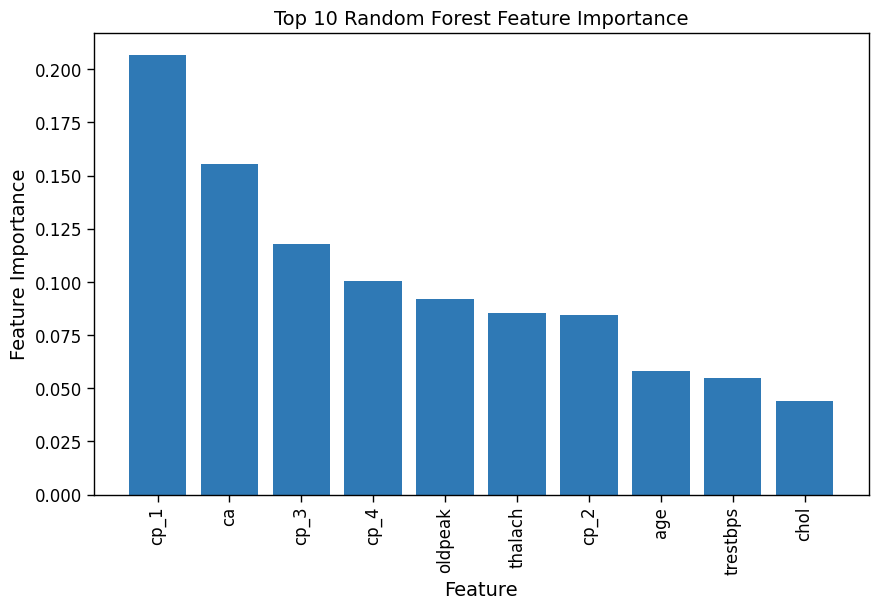

In [527]:
# Get feature names
feature_names = X_train.columns  # Assuming X_train is a DataFrame

# Sort feature importances and get indices of top 10 features
top_indices = np.argsort(best_rf_classifier.feature_importances_)[::-1][:10]
top_feature_importances = best_rf_classifier.feature_importances_[top_indices]
top_feature_names = feature_names[top_indices]

# Plot top 10 feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(top_feature_importances)), top_feature_importances)
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Feature Importance',fontsize=14)
plt.title('Top 10 Random Forest Feature Importance',fontsize=14)
plt.xticks(range(len(top_feature_names)), top_feature_names, rotation=90,fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('Random_For_Feature_imp.png', bbox_inches='tight')
plt.show()


In [435]:
# Get feature names
feature_names = X_train.columns  # Assuming X_train is a DataFrame

# Sort feature importances and get indices of top 10 features
top_indices = np.argsort(best_rf_classifier.feature_importances_)[::-1][:10]
top_feature_importances = best_rf_classifier.feature_importances_[top_indices]
top_feature_names = feature_names[top_indices]

# Print top 10 feature names and their importance values
print("Top 10 Features and Their Importance Values:")
for name, importance in zip(top_feature_names, top_feature_importances):
    print(f"{name}: {importance:.4f}")

Top 10 Features and Their Importance Values:
cp_1: 0.2069
ca: 0.1556
cp_3: 0.1179
cp_4: 0.1006
oldpeak: 0.0920
thalach: 0.0856
cp_2: 0.0845
age: 0.0580
trestbps: 0.0550
chol: 0.0440


Plotting Confusion Matrix

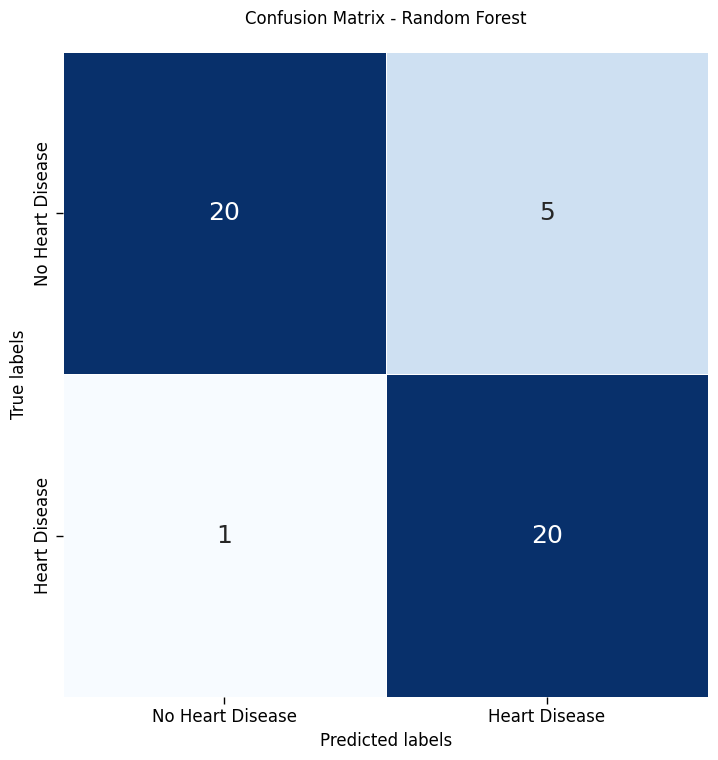

In [535]:
# Plot confusion matrix  for Random Forest
final_predictions = best_rf_classifier.predict(X_test_selected)
plot_confusion_matrix(y_test, final_predictions, model_name='Random Forest', save_path='confusion_matrix')

Decision Tree

In [446]:
# Initialize a Decision Tree classifier for feature selection
feature_selector_dt = DecisionTreeClassifier(random_state=42)

# Fit the feature selector to the scaled training data
feature_selector_dt.fit(X_train_scaled, y_train)

# Create a selector to identify features with importance greater than the mean importance
feature_importances_dt = feature_selector_dt.feature_importances_
selector_dt = SelectFromModel(feature_selector_dt, threshold=np.mean(feature_importances_dt))

# Transform the training, validation, and test sets to select the most important features
X_train_selected_dt = selector_dt.transform(X_train_scaled)
X_val_selected_dt = selector_dt.transform(X_val_scaled)
X_test_selected_dt = selector_dt.transform(X_test_scaled)

In [447]:
# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42, class_weight='balanced')

# Train the Decision Tree classifier
dt_classifier.fit(X_train_selected_dt, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

Hypertuning Decision Tree

In [450]:
# Initialize the Decision Tree classifier with regularization parameters
dt_classifier = DecisionTreeClassifier(random_state=42)

# Hyperparameters for Decision Tree with regularization
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'ccp_alpha': [0.0, 0.01, 0.1, 1.0]  # Regularization parameter
}

# Grid search for Decision Tree with cross-validation
dt_grid_search = GridSearchCV(dt_classifier, dt_param_grid, cv=5, scoring='accuracy', refit=True)
dt_grid_search.fit(X_train_selected_dt, y_train)

# Best parameters for Decision Tree
best_dt_params = dt_grid_search.best_params_

# Initialize a new Decision Tree classifier with the best parameters
best_dt_classifier = DecisionTreeClassifier(**best_dt_params, random_state=42)

# Train the Decision Tree classifier with the best parameters using cross-validation
cv_scores = cross_val_score(best_dt_classifier, np.concatenate([X_train_selected_dt, X_val_selected_dt]),
                            np.concatenate([y_train, y_val]), cv=5)

# Fit the best Decision Tree classifier on the concatenated training and validation data
best_dt_classifier.fit(np.concatenate([X_train_selected_dt, X_val_selected_dt]), np.concatenate([y_train, y_val]))


DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=4,
                       random_state=42)

In [451]:
# Evaluate the final Decision Tree model performance on the validation set
val_predictions_dt = best_dt_classifier.predict(X_val_selected_dt)
val_accuracy_dt = accuracy_score(y_val, val_predictions_dt)
val_precision_dt = precision_score(y_val, val_predictions_dt)
val_recall_dt = recall_score(y_val, val_predictions_dt)
val_f1_score_dt = f1_score(y_val, val_predictions_dt)

print("\nDecision Tree Model Evaluation Metrics on Validation Set:")
print(f"Accuracy: {val_accuracy_dt * 100:.2f}%")
print(f"Precision: {val_precision_dt:.2f}")
print(f"Recall: {val_recall_dt:.2f}")
print(f"F1 Score: {val_f1_score_dt:.2f}")

# Evaluate the final Decision Tree model performance on the test set
test_predictions_dt = best_dt_classifier.predict(X_test_selected_dt)
test_accuracy_dt = accuracy_score(y_test, test_predictions_dt)
test_precision_dt = precision_score(y_test, test_predictions_dt)
test_recall_dt = recall_score(y_test, test_predictions_dt)
test_f1_score_dt = f1_score(y_test, test_predictions_dt)

print("\nDecision Tree Model Evaluation Metrics on Test set:")
print(f"Accuracy: {test_accuracy_dt * 100:.2f}%")
print(f"Precision: {test_precision_dt:.2f}")
print(f"Recall: {test_recall_dt:.2f}")
print(f"F1 Score: {test_f1_score_dt:.2f}")


Decision Tree Model Evaluation Metrics on Validation Set:
Accuracy: 84.44%
Precision: 0.89
Recall: 0.77
F1 Score: 0.83

Decision Tree Model Evaluation Metrics on Test set:
Accuracy: 80.43%
Precision: 0.80
Recall: 0.76
F1 Score: 0.78


In [452]:
# Evaluate the final Decision Tree model performance on the training set
train_predictions_dt = best_dt_classifier.predict(X_train_selected_dt)
train_accuracy_dt = accuracy_score(y_train, train_predictions_dt)
train_precision_dt = precision_score(y_train, train_predictions_dt)
train_recall_dt = recall_score(y_train, train_predictions_dt)
train_f1_score_dt = f1_score(y_train, train_predictions_dt)

print("\nDecision Tree Model Evaluation Metrics on Training set:")
print(f"Accuracy: {train_accuracy_dt * 100:.2f}%")
print(f"Precision: {train_precision_dt:.2f}")
print(f"Recall: {train_recall_dt:.2f}")
print(f"F1 Score: {train_f1_score_dt:.2f}")


Decision Tree Model Evaluation Metrics on Training set:
Accuracy: 87.74%
Precision: 0.90
Recall: 0.82
F1 Score: 0.86


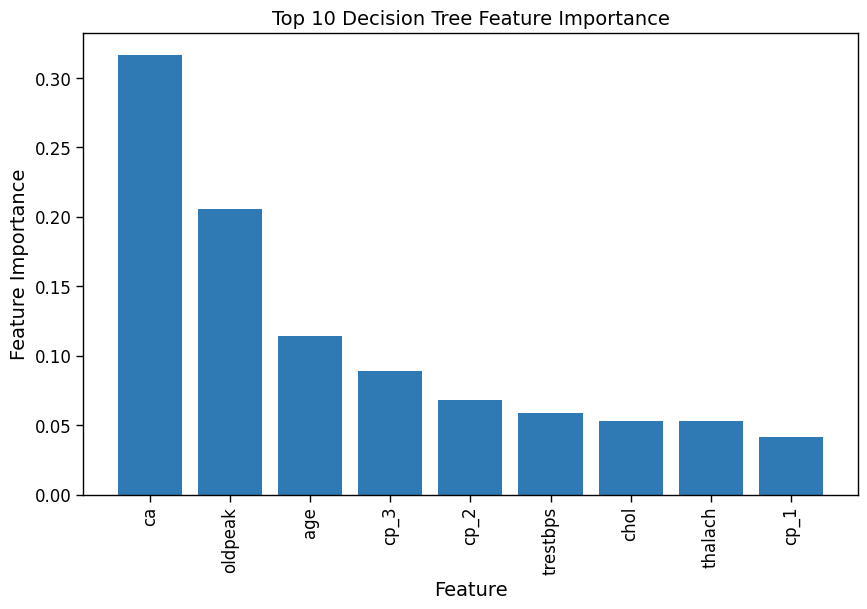

In [536]:
# Get feature names
feature_names_dt = X_train.columns

# Sort feature importances and get indices of top 10 features
top_indices_dt = np.argsort(best_dt_classifier.feature_importances_)[::-1][:10]
top_feature_importances_dt = best_dt_classifier.feature_importances_[top_indices_dt]
top_feature_names_dt = feature_names_dt[top_indices_dt]

# Plot top 10 feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(top_feature_importances_dt)), top_feature_importances_dt)
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Feature Importance',fontsize=14)
plt.title('Top 10 Decision Tree Feature Importance',fontsize=14)
plt.xticks(range(len(top_feature_names_dt)), top_feature_names_dt, rotation=90,fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('Decision_Tree_Feature_imp.png', bbox_inches='tight')
plt.show()

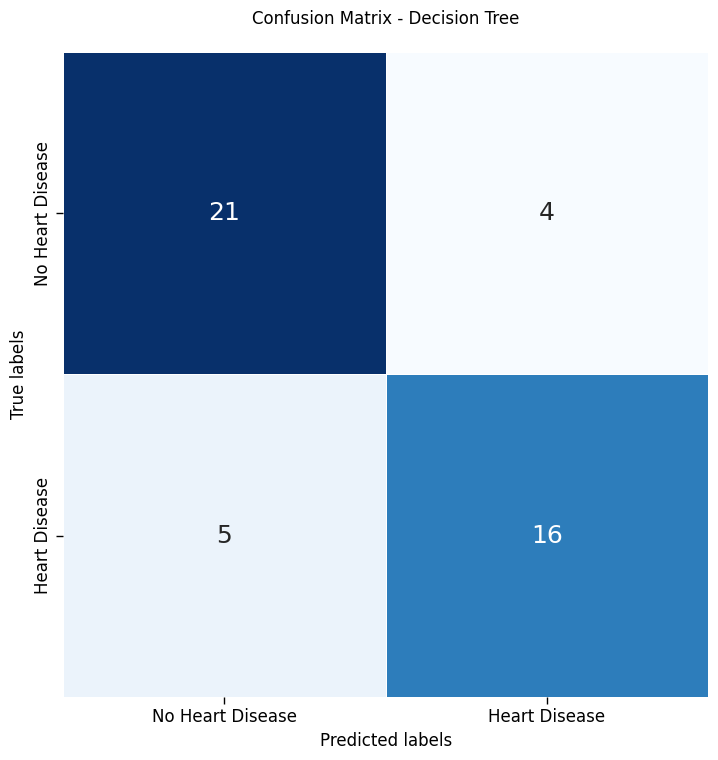

In [537]:
# Plot confusion matrix for Decision Tree
final_predictions_dt = best_dt_classifier.predict(X_test_selected_dt)
plot_confusion_matrix(y_test, final_predictions_dt, model_name='Decision Tree', save_path='confusion_matrix_dt')

Logistic Regression

In [457]:
# Initialize a Logistic Regression classifier with L1 regularization for feature selection
feature_selector_lr = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)

# Fit the feature selector to the scaled training data
feature_selector_lr.fit(X_train_scaled, y_train)

# Create a selector to identify features with non-zero coefficients
selector_lr = SelectFromModel(feature_selector_lr)

# Transform the training, validation, and test sets to select the most important features
X_train_selected_lr = selector_lr.transform(X_train_scaled)
X_val_selected_lr = selector_lr.transform(X_val_scaled)
X_test_selected_lr = selector_lr.transform(X_test_scaled)


In [458]:
# Initialize the Logistic Regression classifier
lr_classifier = LogisticRegression(random_state=42,class_weight='balanced')

# Train the Logistic Regression classifier
lr_classifier.fit(X_train_selected_lr, y_train)

LogisticRegression(class_weight='balanced', random_state=42)

In [459]:
# Hyperparameters for Logistic Regression
lr_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
}

# Grid search for Logistic Regression with cross-validation
lr_grid_search = GridSearchCV(lr_classifier, lr_param_grid, cv=5, scoring='accuracy', refit=True)
lr_grid_search.fit(X_train_selected_lr, y_train)

# Best parameters for Logistic Regression
best_lr_params = lr_grid_search.best_params_

# Initialize a new Logistic Regression classifier with the best parameters
best_lr_classifier = LogisticRegression(**best_lr_params, random_state=42)

# Train the Logistic Regression classifier with the best parameters on the entire training and validation data
best_lr_classifier.fit(np.concatenate([X_train_selected_lr, X_val_selected_lr]), np.concatenate([y_train, y_val]))


LogisticRegression(C=100, random_state=42)

In [461]:
# Evaluate the final Logistic Regression model performance on the validation set
val_predictions_lr = best_lr_classifier.predict(X_val_selected_lr)
val_accuracy_lr = accuracy_score(y_val, val_predictions_lr)
val_precision_lr = precision_score(y_val, val_predictions_lr)
val_recall_lr = recall_score(y_val, val_predictions_lr)
val_f1_score_lr = f1_score(y_val, val_predictions_lr)

print("\nLogistic Regression Model Evaluation Metrics on Validation Set:")
print(f"Accuracy: {val_accuracy_lr * 100:.2f}%")
print(f"Precision: {val_precision_lr:.2f}")
print(f"Recall: {val_recall_lr:.2f}")
print(f"F1 Score: {val_f1_score_lr:.2f}")

# Evaluate the final Logistic Regression model performance on the test set
test_predictions_lr = best_lr_classifier.predict(X_test_selected_lr)
test_accuracy_lr = accuracy_score(y_test, test_predictions_lr)
test_precision_lr = precision_score(y_test, test_predictions_lr)
test_recall_lr = recall_score(y_test, test_predictions_lr)
test_f1_score_lr = f1_score(y_test, test_predictions_lr)

print("\nLogistic Regression Model Evaluation Metrics on Test set:")
print(f"Accuracy: {test_accuracy_lr * 100:.2f}%")
print(f"Precision: {test_precision_lr:.2f}")
print(f"Recall: {test_recall_lr:.2f}")
print(f"F1 Score: {test_f1_score_lr:.2f}")


Logistic Regression Model Evaluation Metrics on Validation Set:
Accuracy: 84.44%
Precision: 0.86
Recall: 0.82
F1 Score: 0.84

Logistic Regression Model Evaluation Metrics on Test set:
Accuracy: 82.61%
Precision: 0.74
Recall: 0.95
F1 Score: 0.83


In [462]:
# Evaluate the final Logistic Regression model performance on the training set
train_predictions_lr = best_lr_classifier.predict(X_train_selected_lr)
train_accuracy_lr = accuracy_score(y_train, train_predictions_lr)
train_precision_lr = precision_score(y_train, train_predictions_lr)
train_recall_lr = recall_score(y_train, train_predictions_lr)
train_f1_score_lr = f1_score(y_train, train_predictions_lr)

print("\nLogistic Regression Model Evaluation Metrics on Training Set:")
print(f"Accuracy: {train_accuracy_lr * 100:.2f}%")
print(f"Precision: {train_precision_lr:.2f}")
print(f"Recall: {train_recall_lr:.2f}")
print(f"F1 Score: {train_f1_score_lr:.2f}")


Logistic Regression Model Evaluation Metrics on Training Set:
Accuracy: 87.26%
Precision: 0.90
Recall: 0.81
F1 Score: 0.85


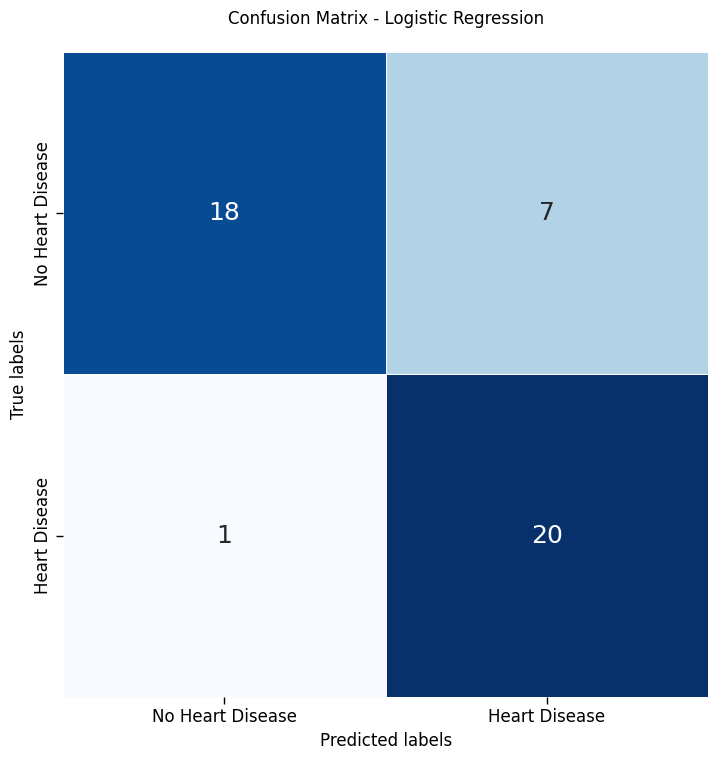

In [538]:
# Plot confusion matrix for Logistic Regression
final_predictions_lr = best_lr_classifier.predict(X_test_selected_lr)
plot_confusion_matrix(y_test, final_predictions_lr, model_name='Logistic Regression', save_path='confusion_matrix_lr')

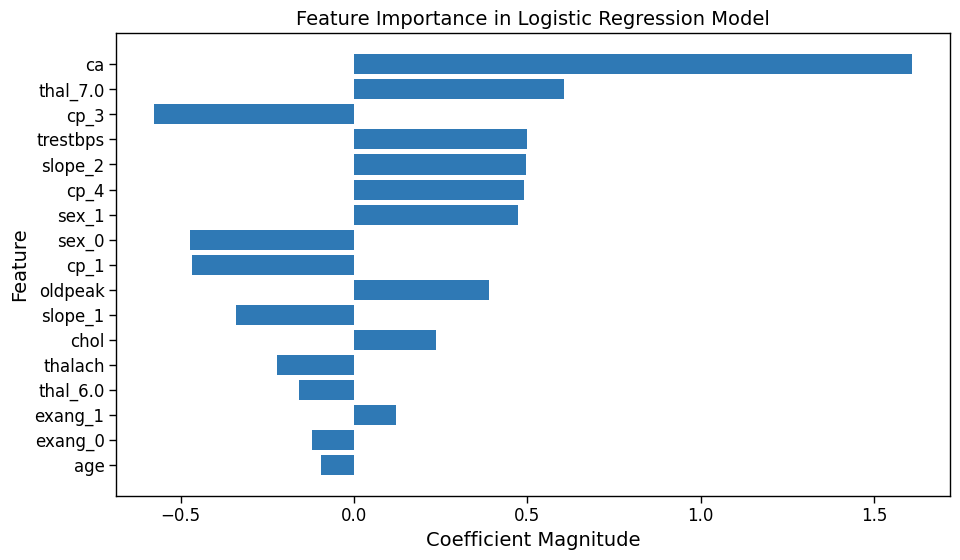

In [539]:
# Get the coefficients from the trained logistic regression model
coefficients = best_lr_classifier.coef_[0]

# Get the names of the selected features
selected_feature_names = [feature_names[i] for i in selector_lr.get_support(indices=True)]

# Create a dictionary mapping feature names to their coefficients
feature_coefficient = dict(zip(selected_feature_names, coefficients))

# Create a DataFrame from the dictionary
feature_df = pd.DataFrame({'Feature': selected_feature_names, 'Coefficient': coefficients})

# Sort the DataFrame based on the absolute coefficients for better visualization
feature_df = feature_df.reindex(feature_df['Coefficient'].abs().sort_values(ascending=False).index)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_df)), feature_df['Coefficient'], align='center')
plt.xticks(fontsize=12)
plt.yticks(range(len(feature_df)), feature_df['Feature'],fontsize=12)
plt.xlabel('Coefficient Magnitude',fontsize=14)
plt.ylabel('Feature',fontsize=14)
plt.title('Feature Importance in Logistic Regression Model',fontsize=14)
plt.gca().invert_yaxis()
plt.tight_layout()  # Adjust layout for better spacing
plt.savefig('feature_importance_lr.png', bbox_inches='tight')
plt.show()

# **Model Comparison**

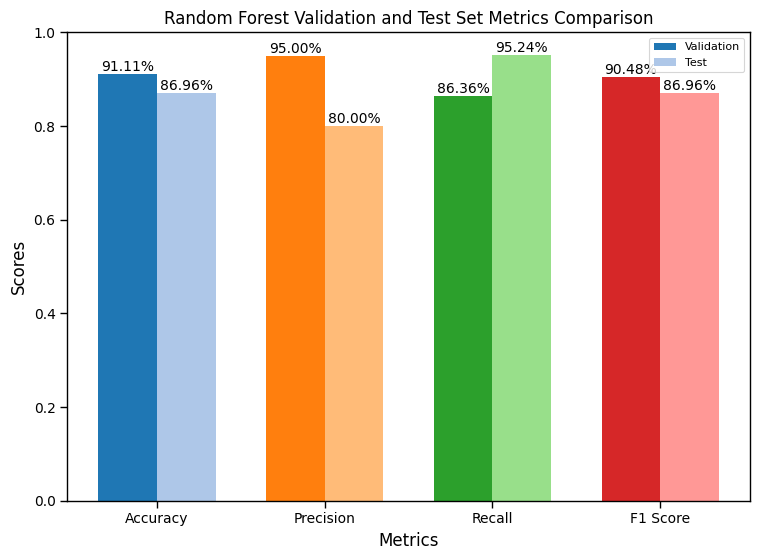

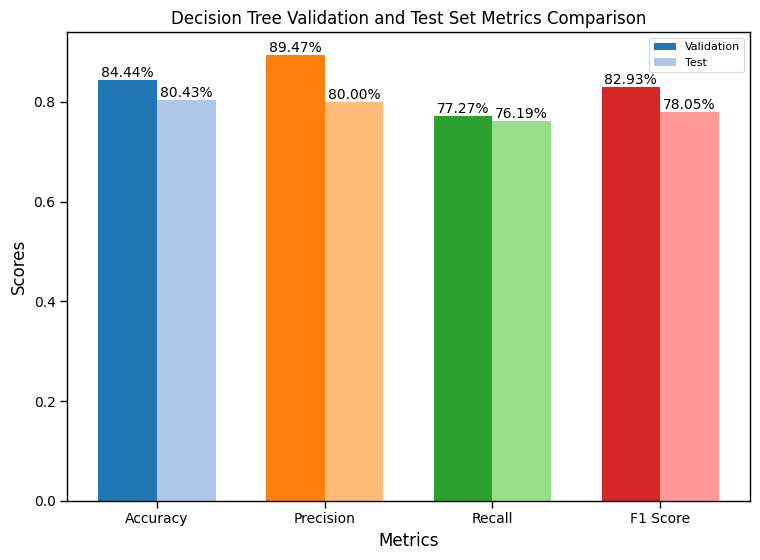

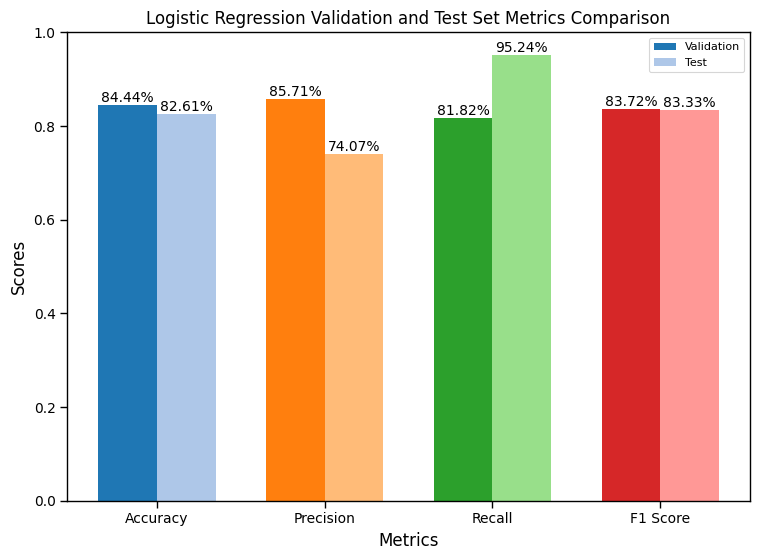

In [491]:
# Plotting separate bar charts for each model

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'] # colors for validation sets
test_colors = ['#aec7e8', '#ffbb78', '#98df8a', '#ff9896'] # colors for test sets

for model in models:
    plt.figure(figsize=(8, 6))
    index = np.arange(len(metrics))
    bar_width = 0.35

    val_values = val_metrics[model]
    test_values = test_metrics[model]

    plt.bar(index, val_values, bar_width, color=colors, label='Validation')
    plt.bar(index + bar_width, test_values, bar_width, color=test_colors, label='Test')

    # Annotate bars with percentage values
    for i in range(len(metrics)):
        plt.text(index[i], val_values[i], f'{val_values[i]*100:.2f}%', ha='center', va='bottom', fontsize=10)
        plt.text(index[i] + bar_width, test_values[i], f'{test_values[i]*100:.2f}%', ha='center', va='bottom', fontsize=10)

    plt.xlabel('Metrics', fontsize=12)
    plt.ylabel('Scores', fontsize=12)
    plt.title(f'{model} Validation and Test Set Metrics Comparison', fontsize=12)
    plt.xticks(index + bar_width / 2, metrics, fontsize=10)  # Adjust fontsize of x-axis labels
    plt.yticks(fontsize=10)  # Adjust fontsize of y-axis labels
    plt.legend(fontsize=8)  # Reduce fontsize of legend
    plt.tight_layout()
    plt.savefig(f'{model}_comparison.png', bbox_inches='tight')
    plt.show()
